# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
lats

Number of cities in the list: 612


array([ 32.88903539,  64.38291251, -41.74638978, ..., -16.66665209,
       -31.74303697, -85.70631598])

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    city_url = url + "&q=" + city
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
            
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
      
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tabas
Processing Record 2 of Set 1 | bilibino
Processing Record 3 of Set 1 | east london
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | amahai
Processing Record 6 of Set 1 | avarua
Processing Record 7 of Set 1 | longyearbyen
Processing Record 8 of Set 1 | villa emilio carranza
Processing Record 9 of Set 1 | college
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | bereket
Processing Record 12 of Set 1 | blackmans bay
Processing Record 13 of Set 1 | ribeira grande
Processing Record 14 of Set 1 | wailua homesteads
Processing Record 15 of Set 1 | petropavlovsk-kamchatsky
Processing Record 16 of Set 1 | edinburgh of the seven seas
Processing Record 17 of Set 1 | long
Processing Record 18 of Set 1 | kuanda
Processing Record 19 of Set 1 | namibe
Processing Record 20 of Set 1 | enewetak
Processing Record 21 of Set 1 | el calafate
Processing Record 22 of Se

Processing Record 39 of Set 4 | barysh
Processing Record 40 of Set 4 | twante
Processing Record 41 of Set 4 | hammerfest
Processing Record 42 of Set 4 | usinsk
Processing Record 43 of Set 4 | inarajan village
Processing Record 44 of Set 4 | progreso
Processing Record 45 of Set 4 | newman
Processing Record 46 of Set 4 | medina
Processing Record 47 of Set 4 | panjakent
Processing Record 48 of Set 4 | port alfred
Processing Record 49 of Set 4 | zhob
Processing Record 0 of Set 5 | kenai
Processing Record 1 of Set 5 | lianzhou
Processing Record 2 of Set 5 | skowhegan
Processing Record 3 of Set 5 | lago da pedra
Processing Record 4 of Set 5 | codrington
Processing Record 5 of Set 5 | chimichagua
Processing Record 6 of Set 5 | champerico
Processing Record 7 of Set 5 | east end
Processing Record 8 of Set 5 | prince rupert
Processing Record 9 of Set 5 | juneau
Processing Record 10 of Set 5 | buka
Processing Record 11 of Set 5 | nicoya
Processing Record 12 of Set 5 | rongelap
Processing Record 1

Processing Record 31 of Set 8 | kone
Processing Record 32 of Set 8 | caleta de carquin
Processing Record 33 of Set 8 | at taj
Processing Record 34 of Set 8 | kabo
Processing Record 35 of Set 8 | dassa-zoume
Processing Record 36 of Set 8 | beledweyne
Processing Record 37 of Set 8 | mitu
Processing Record 38 of Set 8 | yoloten
Processing Record 39 of Set 8 | sinop
Processing Record 40 of Set 8 | yangambi
Processing Record 41 of Set 8 | puerto baquerizo moreno
Processing Record 42 of Set 8 | serenje
Processing Record 43 of Set 8 | buta
Processing Record 44 of Set 8 | smithers
Processing Record 45 of Set 8 | swainsboro
Processing Record 46 of Set 8 | necochea
Processing Record 47 of Set 8 | feijo
Processing Record 48 of Set 8 | qarauyl
Processing Record 49 of Set 8 | tyul'gan
Processing Record 0 of Set 9 | nouadhibou
Processing Record 1 of Set 9 | illizi
Processing Record 2 of Set 9 | havre
Processing Record 3 of Set 9 | hihifo
City not found. Skipping...
Processing Record 4 of Set 9 | vil

Processing Record 21 of Set 12 | zaozersk
Processing Record 22 of Set 12 | qarqaraly
Processing Record 23 of Set 12 | susuman
Processing Record 24 of Set 12 | monrovia
Processing Record 25 of Set 12 | lethem
Processing Record 26 of Set 12 | berdigestyakh
Processing Record 27 of Set 12 | shache
Processing Record 28 of Set 12 | greymouth
Processing Record 29 of Set 12 | inhambane
Processing Record 30 of Set 12 | sao felix do xingu
Processing Record 31 of Set 12 | toga village
City not found. Skipping...
Processing Record 32 of Set 12 | turabah
Processing Record 33 of Set 12 | kannod
Processing Record 34 of Set 12 | el granada
Processing Record 35 of Set 12 | itoman
Processing Record 36 of Set 12 | luau
Processing Record 37 of Set 12 | sault ste. marie
Processing Record 38 of Set 12 | shangri-la
City not found. Skipping...
Processing Record 39 of Set 12 | ancud
Processing Record 40 of Set 12 | beeville
Processing Record 41 of Set 12 | centro familiar la soledad
City not found. Skipping...

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)


# Show Record Count
city_data_df.count()

City          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tabas,33.5959,56.9244,31.98,21,0,3.11,IR,1688418138
1,bilibino,68.0546,166.4372,10.93,95,100,1.61,RU,1688418152
2,east london,-33.0153,27.9116,15.94,75,72,2.36,ZA,1688418037
3,waitangi,-43.9535,-176.5597,7.68,77,100,5.36,NZ,1688418153
4,amahai,-3.3333,128.9167,25.19,90,98,1.46,ID,1688418153


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tabas,33.5959,56.9244,31.98,21,0,3.11,IR,1688418138
1,bilibino,68.0546,166.4372,10.93,95,100,1.61,RU,1688418152
2,east london,-33.0153,27.9116,15.94,75,72,2.36,ZA,1688418037
3,waitangi,-43.9535,-176.5597,7.68,77,100,5.36,NZ,1688418153
4,amahai,-3.3333,128.9167,25.19,90,98,1.46,ID,1688418153


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

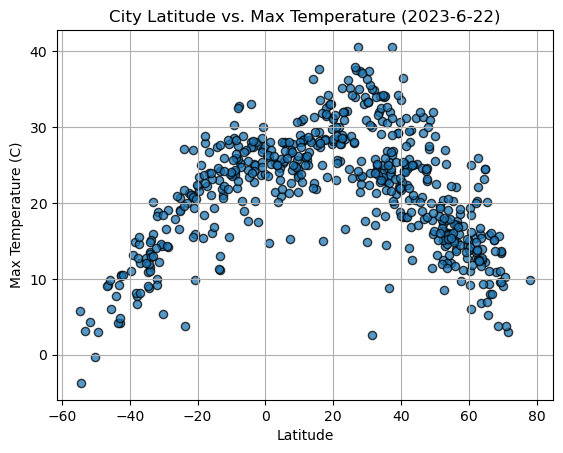

In [8]:
# Build scatter plot for latitude vs. temperature
x = city_data_df["Lat"]
y = city_data_df["Max Temp"]
plt.scatter(x, y, alpha=0.75, edgecolors='black', s=35)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Max Temperature (2023-6-22)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

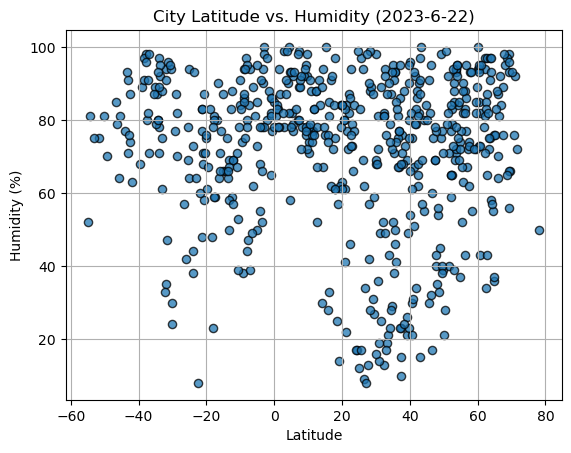

In [9]:
# Build the scatter plots for latitude vs. humidity
x = city_data_df["Lat"]
y = city_data_df["Humidity"]
plt.scatter(x, y, alpha=0.75, edgecolors='black', s=35)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2023-6-22)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

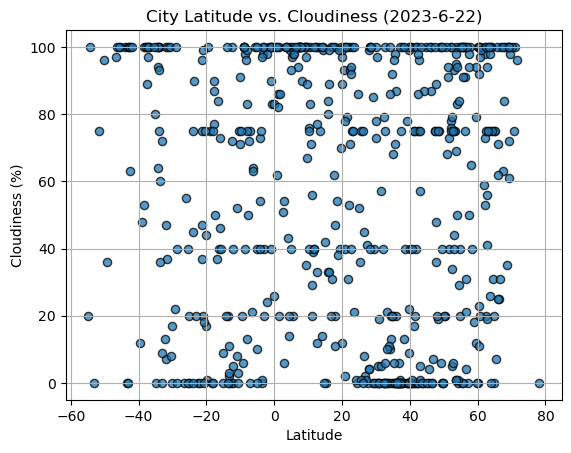

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x = city_data_df["Lat"]
y = city_data_df["Cloudiness"]
plt.scatter(x, y, alpha=0.75, edgecolors='black', s=35)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2023-6-22)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

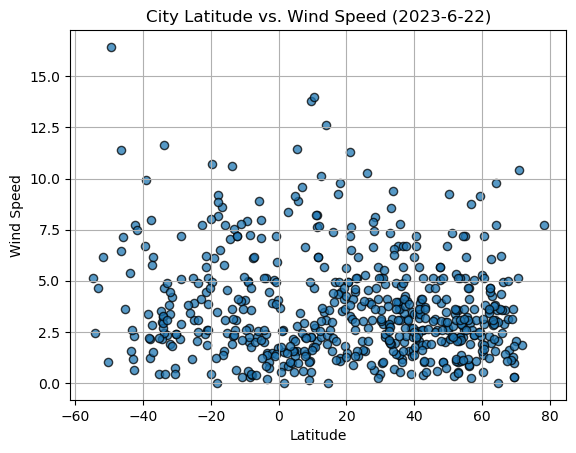

In [11]:
# Build the scatter plots for latitude vs. wind speed
x = city_data_df["Lat"]
y = city_data_df["Wind Speed"]
plt.scatter(x, y, alpha=0.75, edgecolors='black', s=35)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude vs. Wind Speed (2023-6-22)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linearRegression(df, x_col, y_col):
    #get col values
    x = df[x_col]
    y = df[y_col]
    
    #preform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    
    #plt data
    plt.scatter(x, y, alpha=0.75, edgecolors="black", s=35)
    #plt regression line
    plt.plot(x, intercept + slope * x, color="red", label="regression line")
    
    #add labels
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(x_col+ " vs. "+ y_col)
    plt.text(x.min()+15, y.max()-2, f"y={round(slope, 2)}x + {round(intercept, 2)}", color='red', fontsize=15, ha='center')
    plt.grid(True)
    
    print(f"The r-value is: {r_value}")
    #show plt
    plt.show()


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tabas,33.5959,56.9244,31.98,21,0,3.11,IR,1688418138
1,bilibino,68.0546,166.4372,10.93,95,100,1.61,RU,1688418152
6,longyearbyen,78.2186,15.6401,9.91,50,0,7.72,SJ,1688418154
7,villa emilio carranza,19.9667,-96.6000,31.15,63,12,5.60,MX,1688418154
8,college,64.8569,-147.8028,24.49,36,75,0.00,US,1688417952


In [14]:

# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,east london,-33.0153,27.9116,15.94,75,72,2.36,ZA,1688418037
3,waitangi,-43.9535,-176.5597,7.68,77,100,5.36,NZ,1688418153
4,amahai,-3.3333,128.9167,25.19,90,98,1.46,ID,1688418153
5,avarua,-21.2078,-159.7750,27.03,83,47,2.57,CK,1688418153
9,adamstown,-25.0660,-130.1015,20.65,64,0,3.90,PN,1688418154


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.6299572191875932


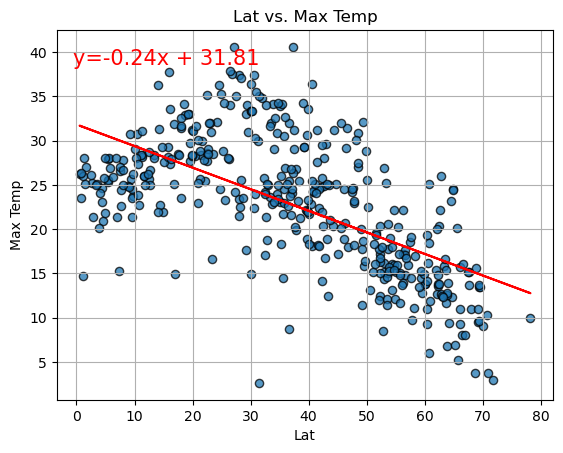

In [15]:
# Linear regression on Northern Hemisphere
linearRegression(northern_hemi_df, "Lat", "Max Temp")

The r-value is: 0.8502744333010701


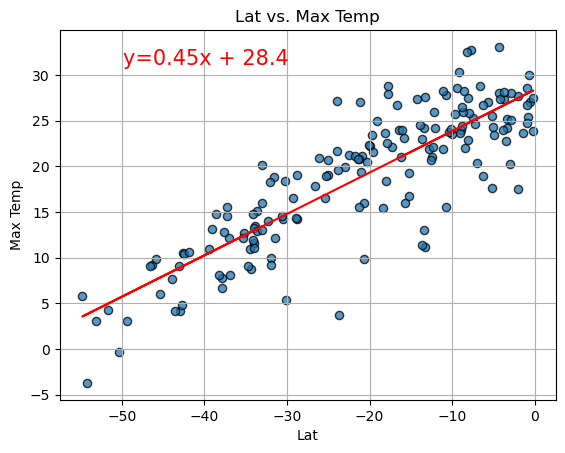

In [16]:
# Linear regression on Southern Hemisphere
linearRegression(southern_hemi_df, "Lat", "Max Temp")

**Discussion about the linear relationship:** The linear regression models show that the closer a location is to latitude 0, or the equator, the warmer the temperature is. The closer to latitude 60, or the poles, the colder the temperature is.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.02005416269594845


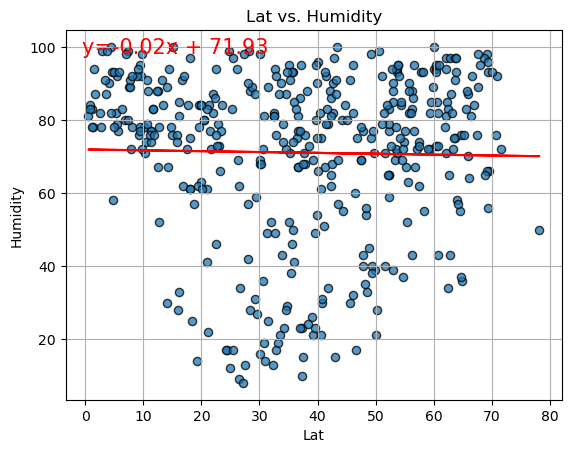

In [17]:
# Northern Hemisphere
linearRegression(northern_hemi_df, "Lat", "Humidity")

The r-value is: -0.050205020119318586


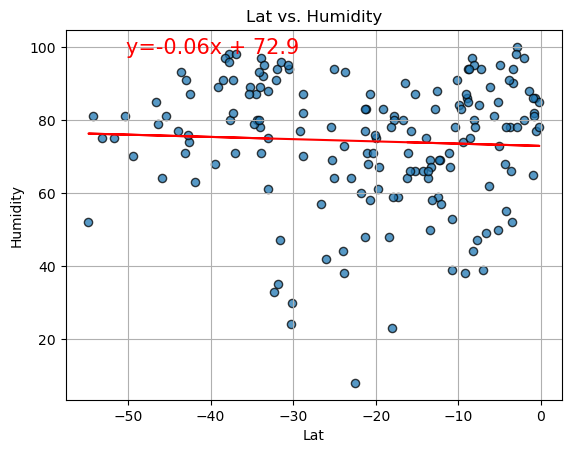

In [18]:
# Southern Hemisphere
linearRegression(southern_hemi_df, "Lat", "Humidity")

**Discussion about the linear relationship:** Humidity vs dryness are common in locations near and far the equator, and there is very little correlation between the two, though is slightly more likely to be dry near the equator.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.05439516825081041


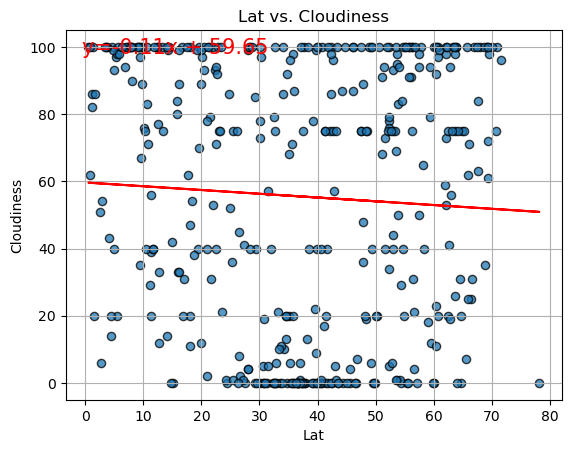

In [19]:
# Northern Hemisphere
linearRegression(northern_hemi_df, "Lat", "Cloudiness")

The r-value is: -0.09377574474309211


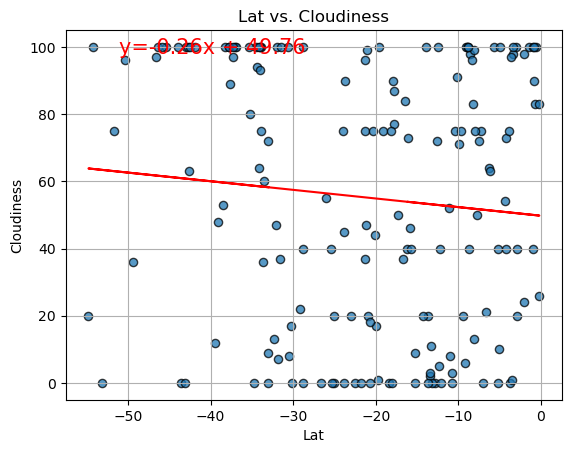

In [20]:
# Southern Hemisphere
linearRegression(southern_hemi_df, "Lat", "Cloudiness")

**Discussion about the linear relationship:** The data shows that in the northern hemisphere, it is more likely to be cloudy the closer one is to the equator. In the southern hemisphere, it is more likely to be cloudy the further one is from the equator. This is likely because it is summer in the northern hemisphere, and there are less clouds in this hemisphere except in the tropics where it is the rainy season. Since it is winter in the southern hemisphere, it is colder and cloudier. And the further from the equator, the colder and cloudier it will be.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.07882002390785263


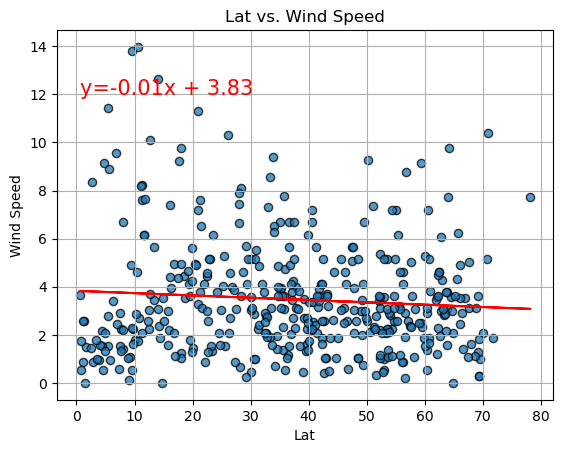

In [21]:
# Northern Hemisphere
linearRegression(northern_hemi_df, "Lat", "Wind Speed")

The r-value is: -0.1268499934722234


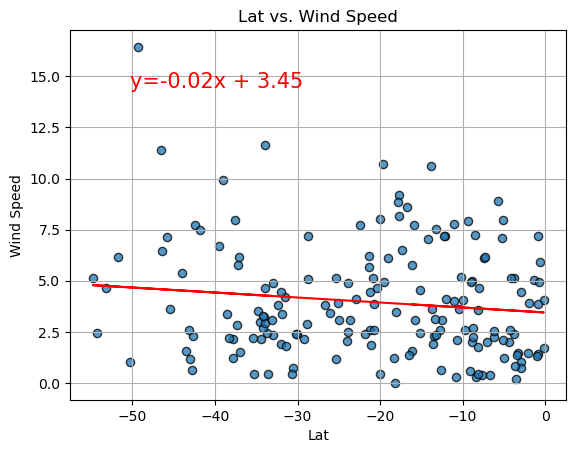

In [22]:
# Southern Hemisphere
linearRegression(southern_hemi_df, "Lat", "Wind Speed")

**Discussion about the linear relationship:** The data shows that in the northern hemisphere, it is on average slightly windier the closer one is to the equator. In the southern hemisphere, it is windier the further one is from the equator. This is again due to the time of year, where tropical storms are found in the northern hemisphere, and winter storms in the southern hemisphere.